In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(style="white")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pickle as pkl

In [6]:
with open("german_df.pkl","rb") as f:
    cleaned_autos = pkl.load(f)

In [7]:
df2=cleaned_autos.copy()

In [8]:
df2['yearOfRegistration'].unique()

array([1993, 2011, 2004, 2001, 2008, 1995, 1980, 2014, 1998, 2005, 1910,
       2016, 2007, 2009, 2002, 2018, 1997, 1990, 2017, 1981, 2003, 1994,
       1991, 1984, 2006, 1999, 2012, 2010, 2000, 1992, 2013, 1996, 1985,
       1989, 2015, 1968, 1982, 1976, 1983, 1959, 1973, 1111, 1969, 1971,
       1987, 1986, 1988, 1967, 1970, 1965, 1945, 1925, 1974, 1979, 1955,
       1978, 1972, 1977, 1961, 1963, 1964, 1960, 1966, 1975, 1937, 1936,
       5000, 1954, 1958, 9999, 1956, 3200, 1000, 1933, 1941, 1962, 8888,
       1500, 2200, 4100, 1929, 1951, 1957, 1940, 3000, 2066, 1949, 2019,
       1800, 1953, 1935, 1234, 8000, 5300, 9000, 2900, 6000, 5900, 5911,
       1400, 1950, 4000, 1948, 1952, 1200, 8500, 1932, 1255, 1927, 1923,
       1931, 3700, 3800, 4800, 1942, 7000, 1911, 6500, 2290, 2500, 1930,
       1001, 6200, 9450, 1944, 1943, 1947, 1934, 1938, 1688, 2800, 1253,
       1928, 7500, 1919, 5555, 7777, 5600, 1600, 1939, 2222, 1039, 9996,
       1300, 8455, 1915, 4500, 1920, 1602, 7800, 92

In [9]:
df3=df2[(df2['yearOfRegistration']>=1920) & (df2['yearOfRegistration']<=2020)]

In [10]:
df3['yearOfRegistration'].unique()

array([1993, 2011, 2004, 2001, 2008, 1995, 1980, 2014, 1998, 2005, 2016,
       2007, 2009, 2002, 2018, 1997, 1990, 2017, 1981, 2003, 1994, 1991,
       1984, 2006, 1999, 2012, 2010, 2000, 1992, 2013, 1996, 1985, 1989,
       2015, 1968, 1982, 1976, 1983, 1959, 1973, 1969, 1971, 1987, 1986,
       1988, 1967, 1970, 1965, 1945, 1925, 1974, 1979, 1955, 1978, 1972,
       1977, 1961, 1963, 1964, 1960, 1966, 1975, 1937, 1936, 1954, 1958,
       1956, 1933, 1941, 1962, 1929, 1951, 1957, 1940, 1949, 2019, 1953,
       1935, 1950, 1948, 1952, 1932, 1927, 1923, 1931, 1942, 1930, 1944,
       1943, 1947, 1934, 1938, 1928, 1939, 1920, 1946], dtype=int64)

## Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot?

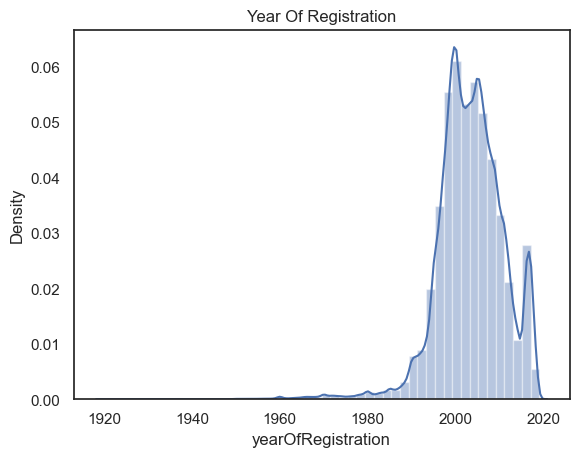

In [8]:
sns.distplot(df3['yearOfRegistration'], kde=True)
plt.title("Year Of Registration")
plt.show()

## Removing Outliers from 'price' column

In [11]:
# Mean of the prices of all the vehicle types
_median = df3.groupby("vehicleType")["price"].median()

# 75th percentile of the prices of all the vehicles types
_quantile75 = df3.groupby("vehicleType")["price"].quantile(0.75)
_quantile25 = df3.groupby("vehicleType")["price"].quantile(0.25)
iqr = (_quantile75 - _quantile25)*1.5 + _median
iqr

vehicleType
Other           5100.000
andere          8434.000
bus            13948.500
compact car     5775.000
convertible    21400.000
coupe          24300.000
kombi          13076.500
limousine      12801.500
suv            28807.125
Name: price, dtype: float64

In [12]:
df3 = df3[((df3["vehicleType"] == "andere") & (df3["price"] <= 8434)) |
        ((df3["vehicleType"] == "Other") & (df3["price"] <= 5100)) |
        ((df3["vehicleType"] == "suv") & (df3["price"] <= 28807)) |
        ((df3["vehicleType"] == "kombi") & (df3["price"] <= 13076)) |
        ((df3["vehicleType"] == "bus") & (df3["price"] <= 13948)) |
        ((df3["vehicleType"] == "convertible") & (df3["price"] <= 21400)) |
        ((df3["vehicleType"] == "limousine") & (df3["price"] <= 12801)) |
        ((df3["vehicleType"] == "coupe") & (df3["price"] <= 24300)) |
        ((df3["vehicleType"] == "compact car") & (df3["price"] <= 5775))]

## Create a plot based on the Variation of the price range by the vehicle type

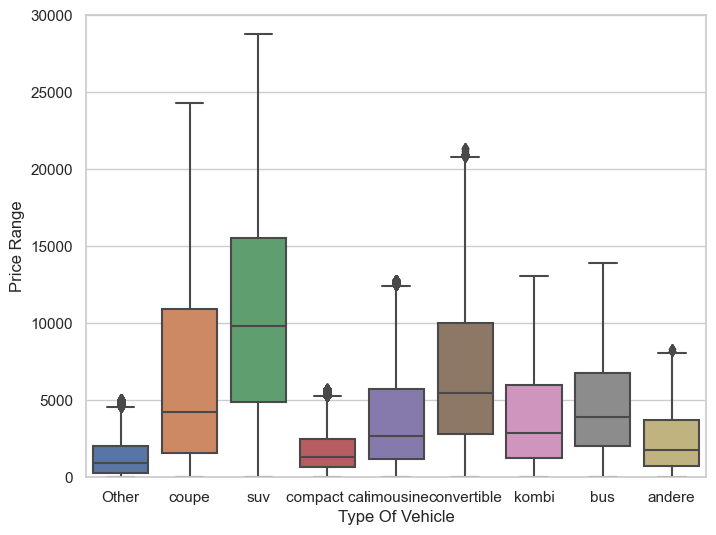

In [13]:
sns.set_style("whitegrid")
fig= plt.subplots(figsize=(8,6))
sns.boxplot(x="vehicleType",y='price' ,data=df3)
plt.ylim(0,30001)
plt.xlabel("Type Of Vehicle")
plt.ylabel("Price Range")
plt.show()

## Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client

<Axes: xlabel='count', ylabel='vehicleType'>

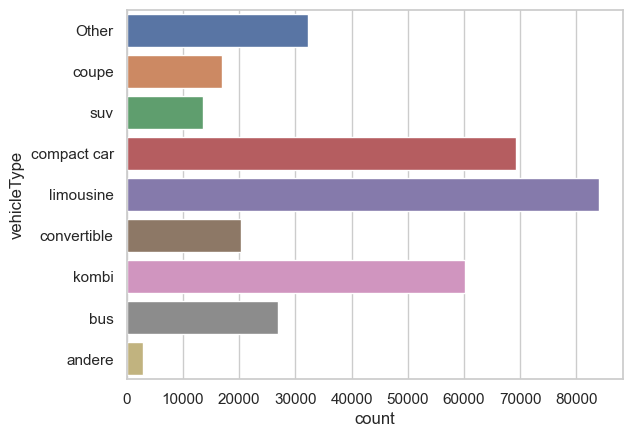

In [15]:
sns.countplot(y="vehicleType", data=df3)

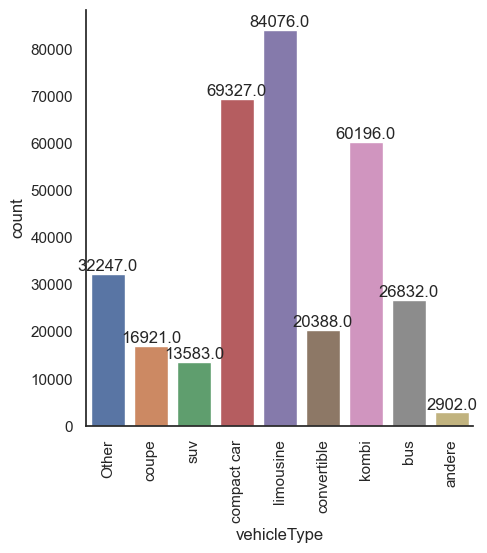

In [18]:
g = sns.catplot(x="vehicleType", data=df3, kind="count")
g.set_xticklabels(rotation=90)

# Add data labels above each bar in each facet
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 10,  # Adjust offset as needed
            height,
            ha="center",
            va="bottom",
        )

plt.show()


In [13]:
import pickle as pkl

In [15]:
with open('cleaned_df.pkl','wb') as f:
    pkl.dump(df3,f) ## Dumping the updated dataframe into a new pickle file

In [5]:
with open("cleaned_df.pkl","rb") as f:
    cleaned_autos = pkl.load(f) ## Loading data from cleaned_df.pkl

In [17]:
dataset=cleaned_autos.copy()

In [18]:
dataset

,name,seller,model,brand,offerType,price,abtest,vehicleType,gearbox,powerPS,fuelType,kilometer,notRepairedDamage,yearOfRegistration,monthOfRegistration,postalCode,dateCrawled,dateCreated,lastSeen
0,Golf 3 1.6,private,golf,volkswagen,Offer,480,test,Other,Manual,0,petrol,150000,Other,1993,January,70435,2016-03-24 11:52:17,2016-03-24,2016-04-07 03:16:57
1,A5 Sportback 2.7 Tdi,private,Other,audi,Offer,18300,test,coupe,Manual,190,diesel,125000,Yes,2011,May,66954,2016-03-24 10:58:45,2016-03-24,2016-04-07 01:46:50
2,"Jeep Grand Cherokee ""Overland""",private,grand,jeep,Offer,9800,test,suv,Automatic,163,diesel,125000,Other,2004,August,90480,2016-03-14 12:52:21,2016-03-14,2016-04-05 12:47:46
3,GOLF 4 1 4 3TÜRER,private,golf,volkswagen,Offer,1500,test,compact car,Manual,75,petrol,150000,No,2001,June,91074,2016-03-17 16:54:04,2016-03-17,2016-03-17 17:40:17
4,Skoda Fabia 1.4 TDI PD Classic,private,fabia,skoda,Offer,3600,test,compact car,Manual,69,diesel,90000,No,2008,July,60437,2016-03-31 17:25:20,2016-03-31,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371522,Mitsubishi Cold,private,colt,mitsubishi,Offer,0,control,Other,Manual,0,petrol,150000,Yes,2005,July,2694,2016-03-21 09:50:58,2016-03-21,2016-03-21 10:42:49
371523,Suche t4 vito ab 6 sitze,private,Other,sonstige_autos,Offer,2200,test,Other,Unspecified,0,Other,20000,Other,2005,January,39576,2016-03-14 17:48:27,2016-03-14,2016-04-06 00:46:52
371524,Smart smart leistungssteigerung 100ps,private,fortwo,smart,Offer,1199,test,convertible,Automatic,101,petrol,125000,No,2000,March,26135,2016-03-05 19:56:21,2016-03-05,2016-03-11 18:17:12
371525,Volkswagen Multivan T4 TDI 7DC UY2,private,transporter,volkswagen,Offer,9200,test,bus,Manual,102,diesel,150000,No,1996,March,87439,2016-03-19 18:57:12,2016-03-19,2016-04-07 07:15:26


### Converting price from euros to dollars.

In [19]:
dataset['price']=dataset['price'].apply(lambda x:x*1.10)

In [20]:
dataset.rename(columns={'price':'dollar_price'},inplace=True)

In [21]:
dataset['dollar_price']=dataset['dollar_price'].astype(int)

## Is there any relationship between dollar_price and kilometer? (Explain with appropriate analysis)

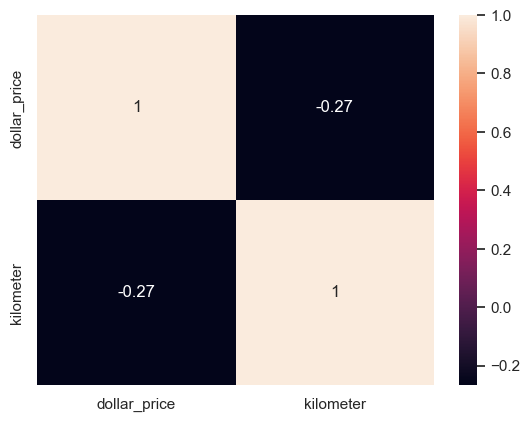

In [22]:
sns.heatmap(dataset[['dollar_price','kilometer']].corr(),annot=True)
plt.show()

### Analysis: 

In [30]:
with open('cleaned_df.pkl','wb') as f:
    pkl.dump(dataset,f)